In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

In [3]:
df = pd.read_excel('NewsResult_20200502-20210502.xlsx',
                 index_col='일자', parse_dates=True)
df.head(1)

,뉴스 식별자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
일자,,,,,,,,,,,,,,,,,,
2021-05-02,2.100601e+06,한국경제,안대규(powerzanic@hankyung.com),"알파에너웍스, 컬러 태양광 외장재 시장 주도",경제>자동차,경제>반도체,NaN,NaN,NaN,NaN,안현진,"동대문디자인플라자,미국,송파,태양광,신사,서울,원천,쿠퍼티노,합정동,캘리포니아주,롯...","한화,정부,애플,알파홀딩스,테슬라,레드 그린,알파에너웍스,YG엔터테인먼트,KT타워,KT","알파에너웍스,주도,컬러,태양광,외장재,시장,쿠퍼티노,미국,캘리포니아주,원반,모양,애...","bipv,태양광,알파에너웍스,외장재,송파,서울,신재생,테슬라,불가능,합정동",미국 캘리포니아주 쿠퍼티노에 있는 원반 모양의 애플 신사옥에는 세계 최대 ‘태양광 ...,https://www.hankyung.com/economy/article/20210...,NaN


In [4]:
print('1년 동안 냉장고 기사: ' + str(len(df)) + '건')

1년 동안 냉장고 기사: 12191건


In [5]:
df1 = df.groupby(df.index.month).size()
df1

일자
1     1004
2     1031
3     1066
4     1033
5      769
6      971
7     1010
8     1003
9     1174
10     883
11    1089
12    1158
dtype: int64

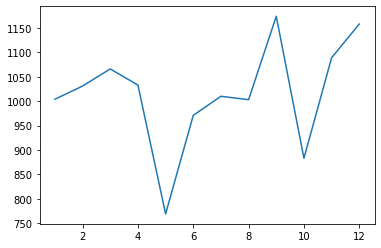

In [6]:
plt.plot(df1.index, df1.values)

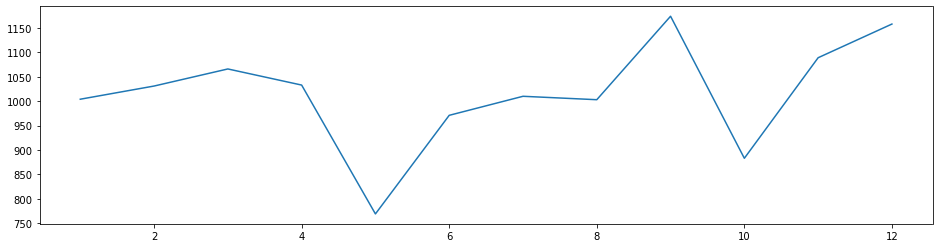

In [7]:
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(df1.index, df1.values)
plt.show()

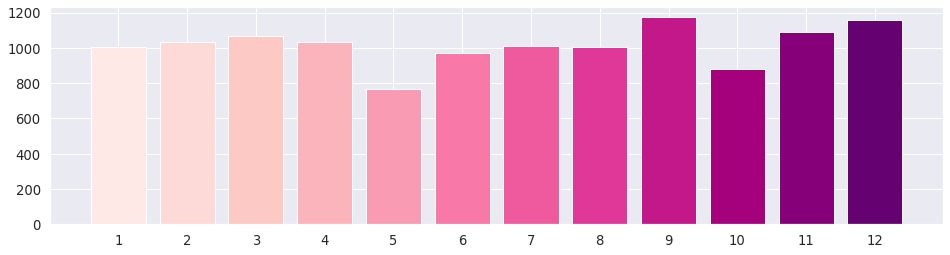

In [15]:
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1,1,1)
ax1.bar(df1.index, df1.values, color=sns.color_palette("RdPu", df1.index.size))
ax1.set_xticks(df1.index)
plt.show()

In [16]:
import collections
import itertools
from wordcloud import WordCloud

In [17]:
kw_dict = collections.Counter(itertools.chain.from_iterable(k.split(',') for k in df['키워드']))
kw_dict

Counter({'알파에너웍스': 10,
         '주도': 468,
         '컬러': 648,
         '태양광': 241,
         '외장재': 22,
         '시장': 6831,
         '쿠퍼티노': 2,
         '미국': 4856,
         '캘리포니아주': 24,
         '원반': 2,
         '모양': 453,
         '애플': 403,
         '세계': 3180,
         '최대': 5307,
         '지붕': 155,
         '설치': 3011,
         '패널': 1281,
         '일반': 1524,
         '태양': 114,
         '건물': 856,
         '일체': 165,
         '설비': 429,
         'BIPV': 47,
         '연간': 521,
         '전력': 468,
         '생산': 3338,
         '환경': 2325,
         '보호': 706,
         '각광': 147,
         '규모': 2463,
         '5조': 122,
         '성장': 1785,
         '전기차': 702,
         '업체': 3399,
         '테슬라': 91,
         '가능성': 1134,
         '산업': 1905,
         '가능': 6882,
         '주목': 1204,
         '5년': 421,
         '상용': 100,
         '시스템반도체': 18,
         '알파홀딩스': 3,
         '전문': 1576,
         '기업': 3965,
         '자회사': 150,
         '분야': 1440,
         '선두': 93,
         

In [18]:
kw_df = pd.DataFrame(list(kw_dict.items()),columns = ['word','count'])
kw_df.sort_values(by=['count'], ascending=False).head(20)

,word,count
119,냉장고,23562
293,백신,18554
185,제품,14317
205,가전,12096
250,접종,11596
242,코로나19,10497
971,삼성전자,10054
991,LG,8595
2601,서비스,6983
199,제공,6919


In [20]:

import platform
path = 'c:\Windows\Fonts\malgun.ttf'
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

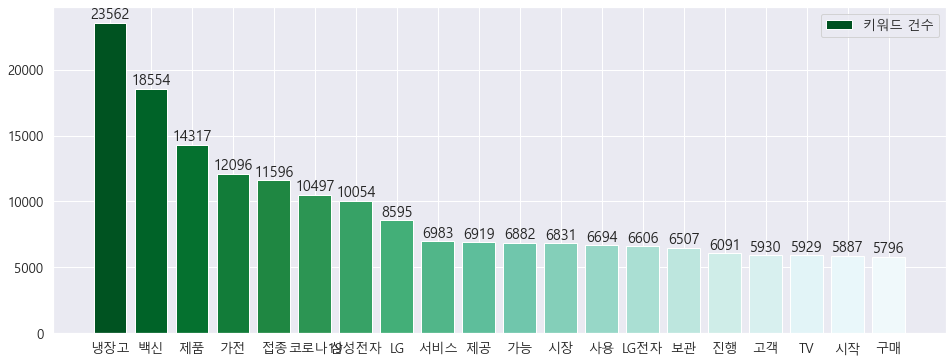

In [21]:

kw_df = kw_df.sort_values(by=['count'], ascending=False).head(20)


fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1,1,1)
rects = ax.bar(kw_df['word'], kw_df['count'], color=sns.color_palette("BuGn_r", kw_df['word'].size))
for rect in rects:
              height = rect.get_height()
              ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha='center', va='bottom')
ax.set_xticks(kw_df['word'])
ax.legend(['키워드 건수'], loc='upper right')
plt.show()

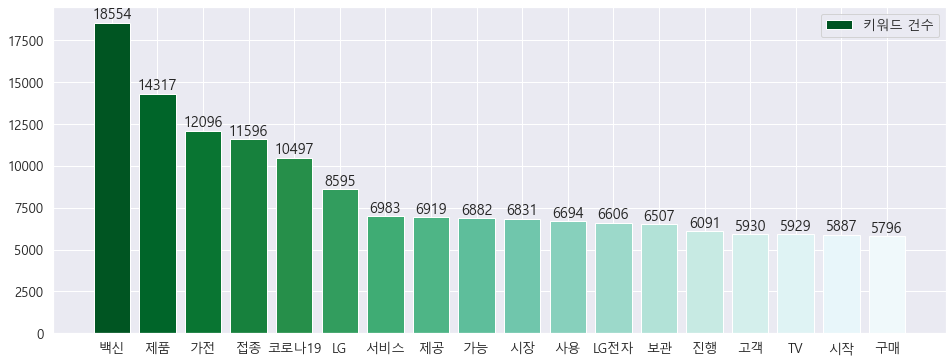

In [25]:

kw_df = kw_df[kw_df['word'].isin(["삼성전자", "냉장고"])==False].sort_values(by=['count'],
                                                                    ascending=False).head(20)

fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1,1,1)
rects = ax.bar(kw_df['word'], kw_df['count'], color=sns.color_palette("BuGn_r", kw_df['word'].size))
for rect in rects:
              height = rect.get_height()
              ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha='center', va='bottom')
ax.set_xticks(kw_df['word'])
ax.legend(['키워드 건수'], loc='upper right')
plt.show()

In [26]:
data = kw_dict

In [27]:

wordcloud = WordCloud(font_path=path,
                      width=800, height=800,
                      max_words=200,
                      background_color="white").generate_from_frequencies(data)
array = wordcloud.to_array()

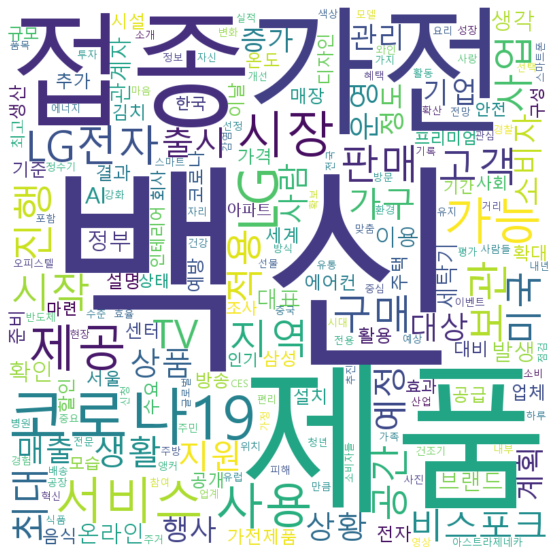

In [35]:
fig = plt.figure(figsize=(10,10))
plt.imshow(array, interpolation="bilinear")
plt.axis("off")
plt.savefig('cloud_40534.png', bbox_inches='tight')
plt.show()

In [36]:
stopwords = ["비스포크", "백신", "접종"]
[data.pop(stopword) for stopword in stopwords]

[4848, 18554, 11596]

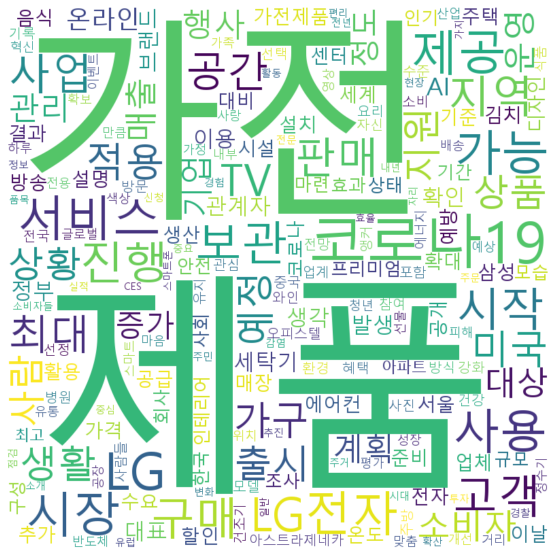

In [37]:
font_path = 'c:/Windows/Fonts/KoPubDotumBold.ttf'
wordcloud = WordCloud(font_path=path,
                      width=800, height=800,
                      max_words=200,
                      background_color="white").generate_from_frequencies(data)
array = wordcloud.to_array()

# 워드클라우드 플롯
fig = plt.figure(figsize=(10,10))
plt.imshow(array, interpolation="bilinear")
plt.axis("off")
plt.savefig('cloud_40534.png', bbox_inches='tight')
plt.show()